In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('data/mushroom.csv')

In [ ]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [ ]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,b'x',b'y',b'n',b'f',b'n',b'f',b'c',b'b',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'w',b'v',b'd',b'e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


Let's explore the data to see if there are any dependencies

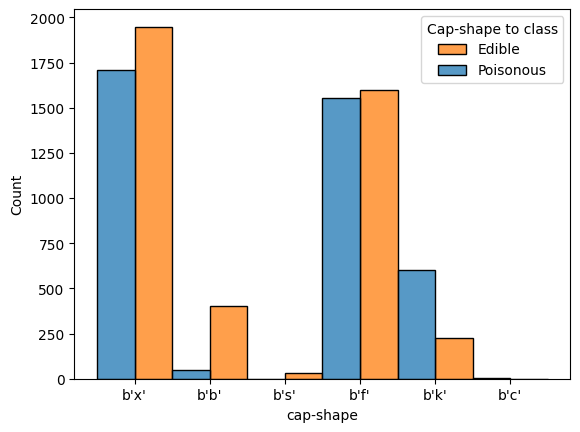

In [ ]:
sns.histplot(data=df, x="cap-shape", hue="class", multiple="dodge", legend=False )
plt.legend(title='Cap-shape to class', loc='upper right', labels=['Edible', 'Poisonous'])

In [ ]:
data = df.groupby(['cap-shape', 'class'])['class'].count()
data

cap-shape  class
b'b'       b'e'      404
           b'p'       48
b'c'       b'p'        4
b'f'       b'e'     1596
           b'p'     1556
b'k'       b'e'      228
           b'p'      600
b's'       b'e'       32
b'x'       b'e'     1948
           b'p'     1708
Name: class, dtype: int64

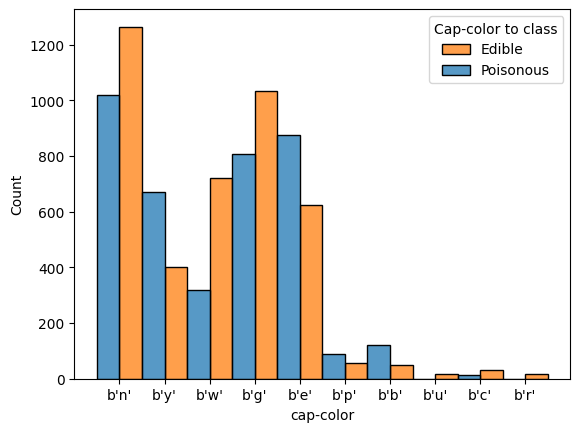

In [ ]:
sns.histplot(data=df, x="cap-color", hue="class", multiple="dodge", legend=False )
plt.legend(title='Cap-color to class', loc='upper right', labels=['Edible', 'Poisonous'])

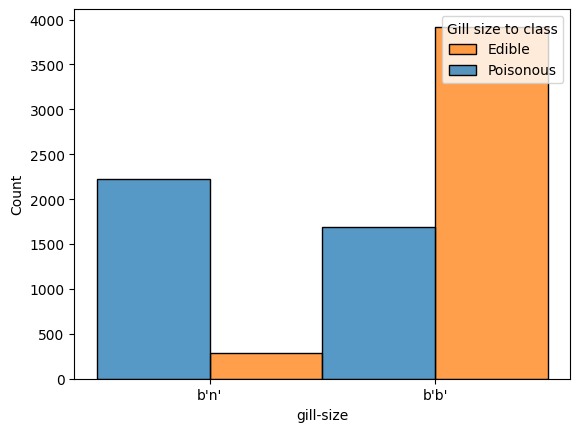

In [ ]:
sns.histplot(data=df, x="gill-size", hue="class", multiple="dodge", legend=False )
plt.legend(title='Gill size to class', loc='upper right', labels=['Edible', 'Poisonous'])

Moving on to the classification mdoel

In [ ]:
#encoding the data from categorical values to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns: 
    df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [ ]:
#scaling the values to be in the same range
from sklearn.preprocessing import MinMaxScaler
Features=df.columns
scaler = MinMaxScaler(feature_range = (0,1))
df_norm = scaler.fit_transform(df)
data_new=pd.DataFrame(df_norm,columns=Features)

In [ ]:
data_new.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333,1.0
1,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667,0.0
2,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000,0.0
3,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333,1.0
4,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667,0.0


<Axes: >

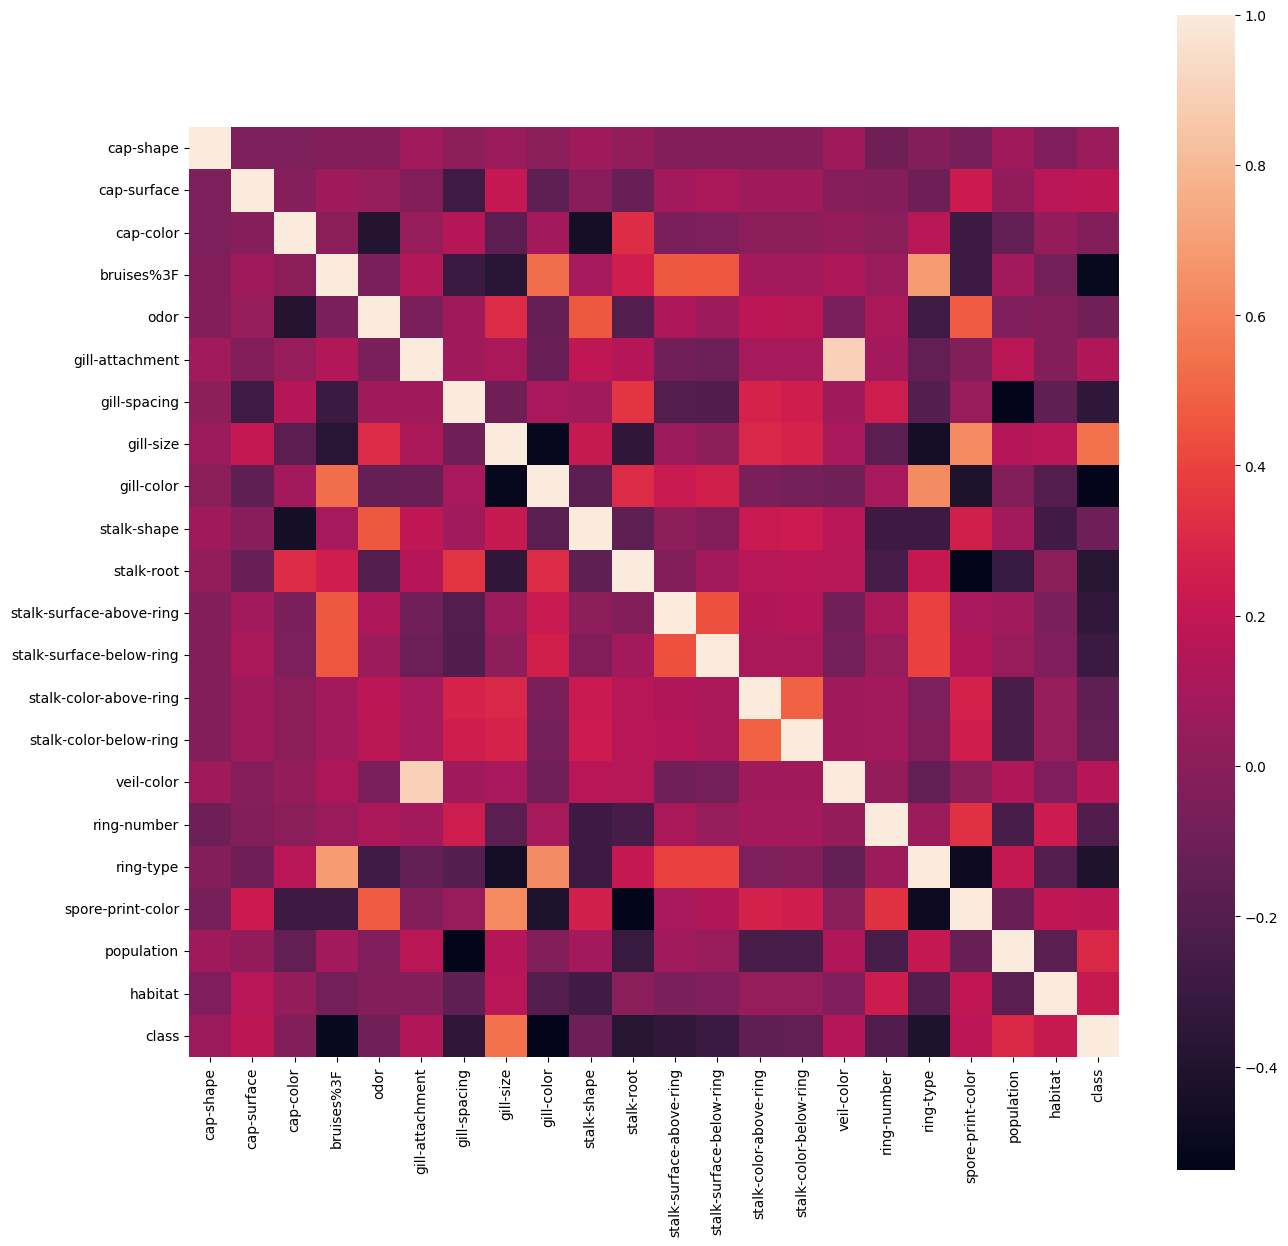

In [ ]:
#checking correlation
data_new = data_new.drop('veil-type', axis=1)
Correlation=data_new.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(Correlation,square=True)

In [ ]:
#splitting the data into train and test subsets and including only highly correlated features (correlation with 'class')
from sklearn.model_selection import train_test_split
X = data_new[['bruises%3F', 'gill-color', 'ring-type', 'gill-spacing']]
y = data_new['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#running the logistic regression model
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression(solver='sag', random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = log_reg.predict(X_test)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train F1: 0.86
Test F1: 0.85


In [ ]:
#since the metrics are not high enough, let's run the logistic regression on all features
from sklearn.model_selection import train_test_split
X = data_new.drop('class', axis=1)
y = data_new['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
log_reg = linear_model.LogisticRegression(solver='sag', random_state=42)

log_reg.fit(X_train, y_train)

y_train_pred1 = log_reg.predict(X_train)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred1)))

y_test_pred1 = log_reg.predict(X_test)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred1)))

Train F1: 0.95
Test F1: 0.95


In [ ]:
#taking a look at all metrics
print(metrics.classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1257
         1.0       0.96      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

